### Loading Data

In [45]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

### Loading libaries

In [46]:
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

### Reshaping data from 3 diemsional cube into 2 diemnsional table

In [47]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

### Normalizing data so it would fit the range [0, 1]

In [48]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ML model

### Scikit learn approach

In [49]:
mlp_sklearn = MLPClassifier(hidden_layer_sizes=(392,98), max_iter=100, activation='relu', solver='adam', random_state=0)
mlp_sklearn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(392, 98), max_iter=100, random_state=0)

In [51]:
y_pred = mlp_sklearn.predict(x_test)

In [56]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)

In [57]:
print(f'Accuracy score: {acc*100:.2f}%')
print(f'F1 score: {f1.mean()*100:.2f}%')

Accuracy score: 98.41%
F1 score: 98.40%


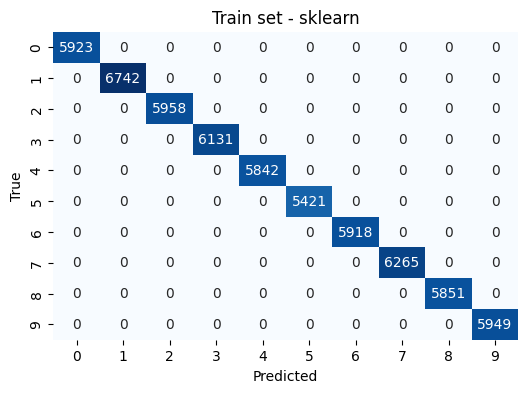

In [62]:
cfm = confusion_matrix(y_train, mlp_sklearn.predict(x_train))

plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Train set - sklearn')
plt.show()

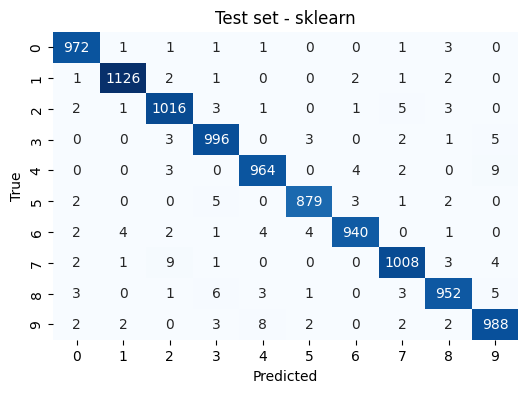

In [63]:
cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test set - sklearn')
plt.show()

### Keras approach

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
y_train.shape

(60000, 10, 2, 2)

In [25]:
mlp_keras = Sequential()
mlp_keras.add(Dense(392, activation='relu', input_shape=(784,)))
mlp_keras.add(Dense(98, activation='relu'))
mlp_keras.add(Dense(10, activation='softmax'))

mlp_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', ])
mlp_keras.summary()

mlp_keras.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

test_results = mlp_keras.evaluate(x_test, y_test, verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 392)               307720    
                                                                 
 dense_19 (Dense)            (None, 98)                38514     
                                                                 
 dense_20 (Dense)            (None, 10)                990       
                                                                 
Total params: 347224 (1.32 MB)
Trainable params: 347224 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
188/188 [==============================] - 3s 15ms/step - loss: 0.3527 - accuracy: 0.8990 - val_loss: 0.1832 - val_accuracy: 0.9449
Epoch 2/10
188/188 [==============================] - 3s 18ms/step - loss: 0.1290 - accuracy: 0.9621 - val_loss: 0.1145 - val_accuracy: 0.9

In [43]:
print(f'Accuracy: {test_results[1]*100:.2f}%')

Accuracy: 97.86%


In [29]:
y_pred = mlp_keras.predict(x_test)

313/313 [==============================] - 3s 7ms/step


In [44]:
pred_labels_keras = np.argmax(y_pred, axis=-1)
true_labels_keras = np.argmax(y_test, axis=-1)

print(f"F1 score: {f1_score(true_labels_keras, pred_labels_keras, average='macro')*100:.2f}%")

F1 score: 97.84%


1875/1875 [==============================] - 4s 2ms/step


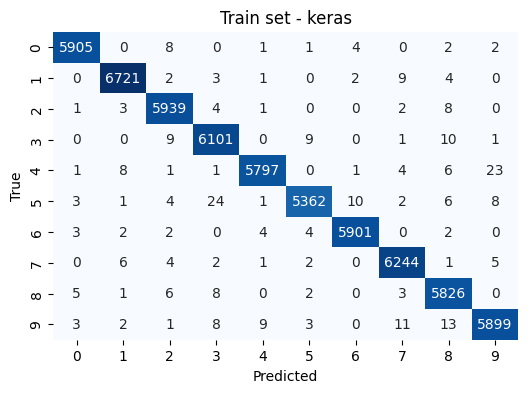

In [41]:
cfm = confusion_matrix(y_train.argmax(1), mlp_keras.predict(x_train).argmax(1))

plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Train set - keras')
plt.show()

313/313 [==============================] - 1s 3ms/step


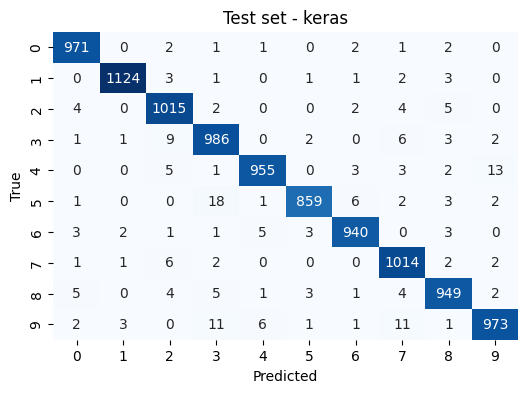

In [42]:
cfm = confusion_matrix(y_test.argmax(1), mlp_keras.predict(x_test).argmax(1))

plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test set - keras')
plt.show()